<a href="https://colab.research.google.com/github/Fcosialls/WCS_Projects/blob/main/PARTIE_1_projet_Climat_WCS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

> Décrit comme “[Le plus grand défi de l'histoire de l'humanité](https://www.youtube.com/watch?v=wW-acBEjQEM)”, le réchauffement climatique et ses conséquences font régulièrement la une de l’actualité.

> “Il s’agit du phénomène d'augmentation des températures moyennes océaniques et
de l'air, induit par la quantité de chaleur piégée à la surface terrestre, mesurée depuis plusieurs décennies, du fait des émissions de gaz à effet de serre (CO 2 , etc.).” - **Wikipédia**

> Cette situation est considérée comme alarmante pour plusieurs raisons, parmi
lesquelles : globalisation mondiale, pétrodépendance, raréfaction des matières
premières...

> Sur la scène de ce drame annoncé, il y a le GIEC, groupe d’expert mondial, qui a pris le sujet au sérieux et publie régulièrement des rapports détaillés censés pousser les décideurs mondiaux à l’action, même si pour l’instant les résultats des COP ont été jugées décevants. Il y a également les [collapsologues](https://www.youtube.com/watch?v=VrljSX_Fz9I), qui essaient d’étudier et de se préparer à l'effondrement des sociétés (civilisations) de notre monde thermo-industriel, effondrement qu’ils estiment inévitable et imminent. De l’autre côté, il y a les climatosceptiques, qui certes sont discrédités et décriés, mais existent bel et
bien, et [dans certains pays augmentent](https://www.huffingtonpost.fr/2018/04/10/les-climatosceptiques-sont-de-plus-en-plus-nombreux-aux-etats-unis-depuis-que-trump-est-president_a_23406376/). Enfin il y a le peuple, les activistes
climatiques, vous, moi, les observateurs actifs, les sceptiques convaincus, tous
acteurs d’un drame annoncé réel ou fictif.

> C’est au milieu de tout ce monde que vous, un Data Analyst, entrez en jeu. En tant que tel, vous avez une vision empirique et rationnelle du monde, avec la “data” comme support de votre raisonnement.


###### Imports et CSV
(*ne pas développer*)

In [ ]:
#à installer
!pip install bar_chart_race

     |████████████████████████████████| 163kB 2.8MB/s 


In [ ]:
#Les librairies

import pandas as pd #def and stat
import numpy as np # math

import plotly as py #viz
import plotly.express as px #map viz
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import io # to import local files
from google.colab import files # to import local file
import matplotlib.pyplot as plt #some viz
from itertools import combinations 
from collections import Counter
from sklearn.linear_model import LinearRegression #for regressions
from sklearn.linear_model import LogisticRegression #for regressions
from sklearn.preprocessing import PolynomialFeatures #for regressions

import bar_chart_race as bcr #Bar Char Race

import seaborn as sns #viz and regre

In [ ]:
# Les fichiers CSV

df_temp=pd.read_csv('https://raw.githubusercontent.com/Fcosialls/WCS_Projects/main/Global_warming/DATA_CSV/GlobalTemperatures.csv')
df = pd.read_csv("https://raw.githubusercontent.com/Fcosialls/WCS_Projects/main/Global_warming/DATA_CSV/GlobalLandTemperaturesByCountry.csv")

###### Code
(*ne pas développer*)

In [ ]:
# Librairies à consulter : 
# https://plotly.com/python/choropleth-maps/
# https://matplotlib.org/examples/color/named_colors.html

In [ ]:
# Ici je traite la donnée pour comparer directement température et emission CO2 dans le temps (entre 1750 et 2018)
#
df_temp['dt'] = pd.to_datetime(df_temp['dt'])
df_temp['Year'] = df_temp['dt'].dt.year
df_temp['YearIndex']=df_temp['Year']
df_temp2=df_temp
df_temp2=df_temp2.set_index('YearIndex')
df_temp2=df_temp2.loc['1875':'2015']

# Travail pour les regressions et écarts températures
df_t_1875=df_temp2[df_temp2['Year']>=1875]

df_t_pivot=df_t_1875.pivot_table(values='LandAndOceanAverageTemperature', index='Year', aggfunc='mean')
df_t_pivot=df_t_pivot.reset_index()

global_mean=df_t_pivot['LandAndOceanAverageTemperature'].mean()
df_t_pivot['GlobalMeanTemp']=global_mean
df_t_pivot['difference_from_average']= df_t_pivot["LandAndOceanAverageTemperature"] - df_t_pivot["GlobalMeanTemp"]

df_pred=df_t_pivot
X = df_pred[['Year']] 
yt = df_pred['LandAndOceanAverageTemperature'] 
Xaxis = df_pred['Year']
mPOLYtemp = np.polyfit(x = Xaxis, y = yt, deg = 2)

          # print("polynomial regression results:")
          # print(mPOLYtemp)

                  # pour préparer les regressions
                      # temp_avg_lr = temp_avg2.to_frame()
                      # temp_avg_lr['Years'] = temp_avg_lr.index
                      # X = temp_avg_lr.iloc[:, 1].values.reshape(-1, 1)
                      # Y = temp_avg_lr.iloc[:, 0].values.reshape(-1, 1)

In [ ]:
#Table pour les océans
piv1=df_t_1875.pivot_table(values='LandAverageTemperature', index='Year', aggfunc='mean')
piv2=df_t_1875.pivot_table(values='LandAndOceanAverageTemperature', index='Year', aggfunc='mean')
df_air_ocean= pd.merge(left=piv1, right=piv2, how='left', left_on='Year', right_on='Year')
OceanAverageTemp = (df_air_ocean['LandAndOceanAverageTemperature']*2) - (df_air_ocean['LandAverageTemperature'])
df_air_ocean['OceanAverageTemp'] = OceanAverageTemp
df_air_ocean=df_air_ocean.reset_index()
df_air_ocean


,Year,LandAverageTemperature,LandAndOceanAverageTemperature,OceanAverageTemp
0,1875,7.859583,14.921917,21.984250
1,1876,8.080083,14.909417,21.738750
2,1877,8.539583,15.282667,22.025750
3,1878,8.829750,15.357417,21.885083
4,1879,8.165833,15.064417,21.963000
...,...,...,...,...
136,2011,9.516000,15.769500,22.023000
137,2012,9.507333,15.802333,22.097333
138,2013,9.606500,15.854417,22.102333
139,2014,9.570667,15.913000,22.255333


In [ ]:
# df_temp3=df_temp
# df_temp3['Month'] = df_temp3['dt'].dt.month
# df_temp3=df_temp3.set_index('YearIndex')
# df_temp3=df_temp3.loc['1875':'2015']

In [ ]:
# Code pour carte choropleth de l'augmentation de la température
df.isnull().sum()

dft = df.drop("AverageTemperatureUncertainty", axis=1)
dft = dft.rename(columns={'dt':'Date'})
dft = dft.rename(columns={'AverageTemperature':'AvTemp'})
dft = dft.dropna()

dft_countries = dft.groupby( ['Country','Date']).sum().reset_index().sort_values('Date', ascending=True)
df_countries2 = dft_countries.sort_values(by=['Country', 'Date'])
df_countries2['Date'] = pd.to_datetime(df_countries2['Date'])
df_countries2['Year'] = df_countries2['Date'].dt.year
df_yc=df_countries2.groupby(['Year', 'Country'])[["AvTemp"]].mean().reset_index()


countries = df['Country'].unique()
average_temp = []

# calc mean temperature
for country in countries:
    average_temp.append(df[df['Country'] == country]['AverageTemperature'].mean())
    
# nan cleaning
res_aver_temp = []
res_countries = []

for i in range(len(average_temp)):
    if not np.isnan(average_temp[i]):
        res_aver_temp.append(average_temp[i])
        res_countries.append(countries[i])
        
# sorting
res_aver_temp, res_countries = (list(x) for x in zip(*sorted(zip(res_aver_temp, res_countries), key=lambda pair: pair[0])))

df_new = pd.DataFrame({'Country': res_countries,
                       'Average_Temp': res_aver_temp})
df_final = pd.merge(left=df_yc, right=df_new, how='left', left_on='Country', right_on='Country')
df_final['difference_from_average']= df_final["AvTemp"] - df_final["Average_Temp"]

df_final2 = df_final
df_final2['YearIndex'] = df_final2['Year']
df_final2 = df_final2.set_index('YearIndex')
df_final2 = df_final2.loc['1875':'2013']
df_final2

,Year,Country,AvTemp,Average_Temp,difference_from_average
YearIndex,,,,,
1875,1875,Afghanistan,14.173333,14.045007,0.128326
1875,1875,Africa,23.369250,24.074203,-0.704953
1875,1875,Albania,11.505833,12.610646,-1.104813
1875,1875,Algeria,22.554917,22.985112,-0.430195
1875,1875,American Samoa,25.819125,26.611965,-0.792840
...,...,...,...,...,...
2013,2013,Western Sahara,23.744250,22.319818,1.424432
2013,2013,Yemen,28.129750,26.253597,1.876153
2013,2013,Zambia,21.196000,21.282956,-0.086956


# Le réchauffement climatique est-il un phénomène réel ?

Afin de savoir si le réchauffement climatique est un phénomène réel, il nous faut observer l'évolution des températures dans le temps.

Cela nous permettra de constater si les température ont tendances à augmenter, stagner ou même baisser. 

## Evolution de la température dans le temps.

Pour observer l'évolution de la température, nous utiliserons les température annuelles moyennes par pays depuis 1875.

Les données remontent jusqu'à 1750. Mais nous avons choisi l'an 1875 car avant cela de nombreux pays ne disposaient pas de données. Aussi, les données antérieures à la premières moitié du 19ème siècle ne sont pas très fiables.
L'augmentation est d'autant plus impressionnante après les années 1980.

Text(0.5, 1.0, 'Evolution de la température terrestres')

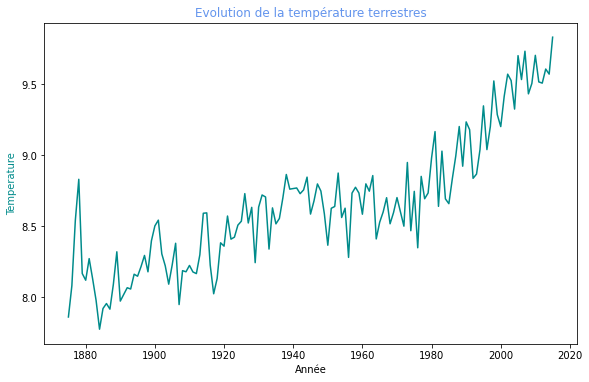

In [ ]:
fig, ax = plt.subplots(figsize = (21,13))
ax1 = plt.subplot(2,2,1) 
ax1.plot(df_air_ocean['Year'],df_air_ocean['LandAverageTemperature'],c='darkcyan')
ax1.set_ylabel('Temperature', color='darkcyan')
ax1.set(xlabel='Année')
ax1.set_title('Evolution de la température terrestres', color='cornflowerblue')

Text(0.5, 1.0, 'Evolution de la température océanique et terrestre')

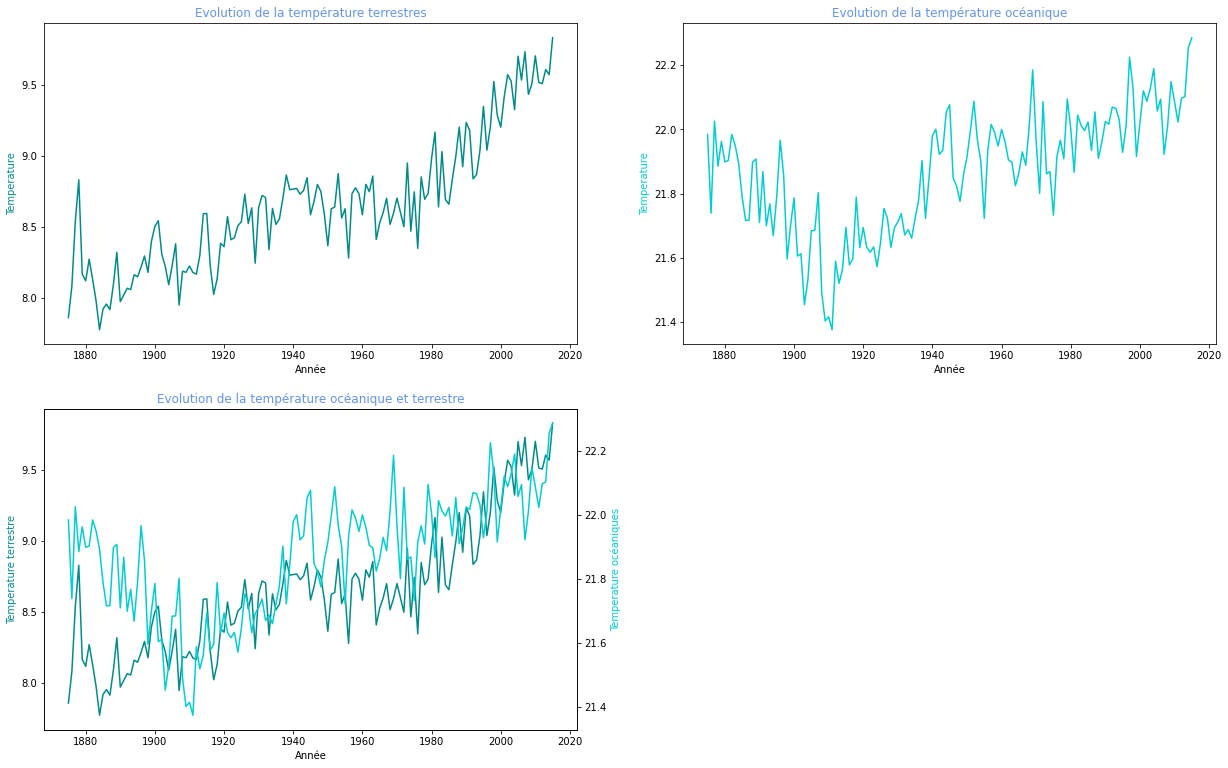

In [ ]:
fig, ax = plt.subplots(figsize = (21,13))
ax1 = plt.subplot(2,2,1) 
ax1.plot(df_air_ocean['Year'],df_air_ocean['LandAverageTemperature'],c='darkcyan')
ax1.set_ylabel('Temperature', color='darkcyan')
ax1.set(xlabel='Année')
ax1.set_title('Evolution de la température terrestres', color='cornflowerblue')

ax2 = plt.subplot(2,2,2)
ax2.plot(df_air_ocean['Year'],df_air_ocean['OceanAverageTemp'],c='darkturquoise')
ax2.set_ylabel('Temperature', color='darkturquoise')
ax2.set(xlabel='Année', title = 'Evolution de la température terrestres')
ax2.set_title('Evolution de la température océanique', color='cornflowerblue')

ax3 = plt.subplot(2,2,3)
ax4=ax3.twinx()
ax3.plot(df_air_ocean['Year'],df_air_ocean['LandAverageTemperature'],c='darkcyan')
ax4.plot(df_air_ocean['Year'],df_air_ocean['OceanAverageTemp'],c='darkturquoise')
ax3.set_ylabel('Temperature terrestre', color='darkcyan')
ax4.set_ylabel('Temperature océaniques', color='darkturquoise')
ax3.set(xlabel='Année', title = 'Evolution de la température terrestres et océaniques')
ax3.set_title('Evolution de la température océanique et terrestre', color='cornflowerblue')

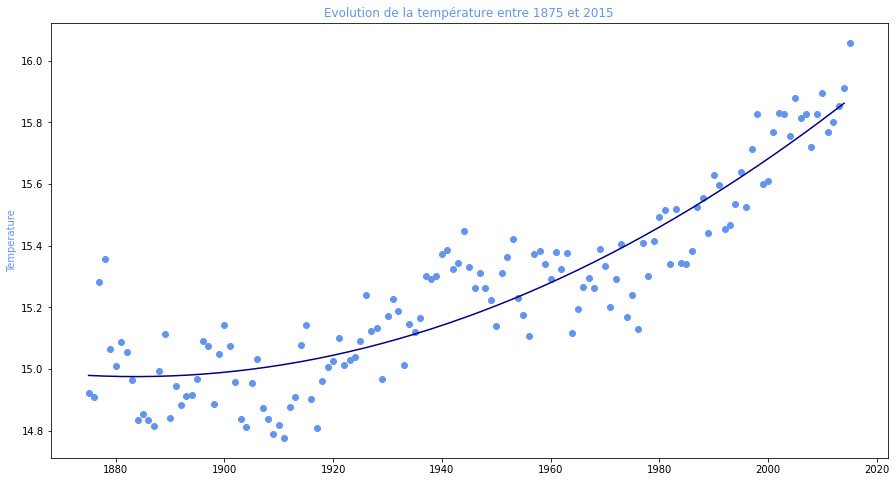

In [ ]:
Xaxis = df_pred['Year']
Yaxis = df_pred['LandAndOceanAverageTemperature']
Xmax = Xaxis.max()
Xmin = Xaxis.min()
array = np.arange(Xmin, Xmax)
polymodel = np.polyfit(x = Xaxis, y = Yaxis, deg = 2) 

fig, ax1 = plt.subplots(figsize = (15,8))

ax1.scatter(x=df_pred['Year'],y=df_pred['LandAndOceanAverageTemperature'],c='cornflowerblue')
ax1.plot(array,np.poly1d(polymodel)(array),c='navy')
ax1.set_ylabel('Temperature', color='cornflowerblue')
ax1.set_title('Evolution de la température entre 1875 et 2015', color='cornflowerblue')
plt.show()

In [ ]:
fig = px.scatter(data_frame = df_t_pivot, 
                 x= "Year", 
                 y="LandAndOceanAverageTemperature",
                 color="difference_from_average",
                 labels={'Year':'Année','difference_from_average':'difference avec la temperature moyenne','LandAndOceanAverageTemperature':'Température'})
fig.update_layout(title={'text':"Evolution de la température dans le temps et écart avec la température globale moyenne", 
                         'y':0.95, 'x':0.45, 
                         'xanchor': 'center', 
                         'yanchor': 'top'})

## Cartographie de l'augmentation de la température

Les couleurs claires indiquent qu'un pays subit des températures au dessus de sa température moyenne. Les couleurs sombres montre des températures en dessous de sa température moyenne.

On remarque que la carte devient de plus en plus claire dans le temps, ce qui indique que les températures dépassens les moyennes. On observe donc bien une augmentation de la température globale.

L'augmentation est d'autant plus impressionnante après les années 1980.

In [ ]:
fig = px.choropleth(df_final2, 
                    locations="Country", 
                    locationmode = "country names", 
                    color="difference_from_average", 
                    hover_name="Country", 
                    animation_frame="Year",
                    scope='world',
                    range_color=[-3.5,3.5],
                    color_continuous_scale='agsunset',
                    labels={'Year':'Année','difference_from_average':'difference avec la temperature moyenne'})

fig.update_layout( title_text = 'Temperatures en-dessous et au-dessus de la moyenne par pays et par an', 
                  title_x = 0.5, geo=dict(showframe = False, 
                                          showcoastlines = False, )) 

fig.show()

# Nos Insights

### Augmentation de la température globale


*   Nous constatons que la température augmente aussi bien sur terre qu'au niveau des océans. Les graphiques que nous avons réalisés, permettent de s'en rendre compte.
    *   En appliquaunt une régression polynomiale à l'augmentation globale de la température. Nous constatons une tendance vers une augmentation de la température qui s'accélère dans le temps.
    *   Le graphique montrant l'écart avec la température moyenne permet d'ailleurs de se rendre compte facilement que l'augmentation de la température va en s'accelérant.
*   Au niveau du globe, nous constatons, grâce à notre carte interactive, qu'aucun pays n'est épargné par l'augmentation de la température. 
    *    Nous obsevons que les pays de l'hémisphère nord sont plus touchés par le réchauffement climatique

### Limites

*   Nous avons calculé la température globale des océans en supposant que le le poids de la température des océans et de la température terrestre était identique. C'est un partie pris qu'il faut prendre en compte et qui peut impatcer nos observation.
---



# Rendez-vous en [PARTIE 2](https://colab.research.google.com/drive/1m_cFX9ux_nm0Av9wMf5BOyHSlYbWLBs4#scrollTo=q3eA9XoCNnDJ&uniqifier=2)

---

Répertoire
*   Partie 1 <-- Vous êtes ici
*   [Partie 2](https://colab.research.google.com/drive/1m_cFX9ux_nm0Av9wMf5BOyHSlYbWLBs4#scrollTo=q3eA9XoCNnDJ&uniqifier=2)
*   [Partie 3](https://)
*   [Partie 4](https://)


